
## Extracting Local Regions of GeoTIFF Images Defined by a shapefile.

This notebook uses fiona (https://fiona.readthedocs.io/en/latest/README.html) and rasterio (https://rasterio.readthedocs.io/en/latest/) to load and view Geospatial data, numpy for manipulating n-dimensional arrays, and matplotlib for visualising images and shapefile geometries. 

These packages are imported along with specific methods from rasterio namely `mask` for cropping data using shapefile regions, and `show` which allows for the viewing of geospatial data in it's native coordinate system (important for performing methods which depend on coordinates).

In [1]:
import fiona

import rasterio
import rasterio.mask
from rasterio.plot import show

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors, cm
plt.rcParams['figure.figsize'] = [12, 12]
cmap = plt.get_cmap('viridis')

import csv
import random


https://rasterio.readthedocs.io/en/latest/topics/plotting.html

In [2]:
RGB_fp1 = r'Data/AVIATE 15July21 50ft half image size_mosaic_group1.tif'
RGB_fp2 = r'Data/AVIATE 25Aug21 50ft half image size_mosaic_group1.tif'

img1 = rasterio.open(RGB_fp1)
img1_np = np.transpose(img1.read(),(1,2,0))

img2 = rasterio.open(RGB_fp2)
img2_np = np.transpose(img2.read(),(1,2,0))

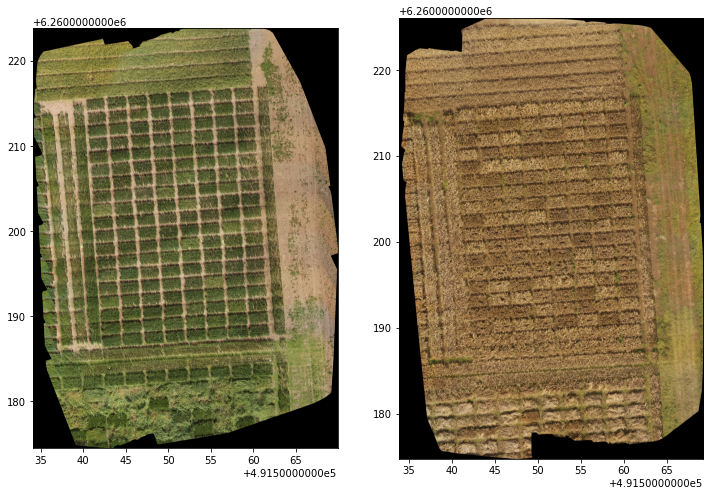

In [3]:
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0])
show(img2, ax=axes[1])
plt.show()

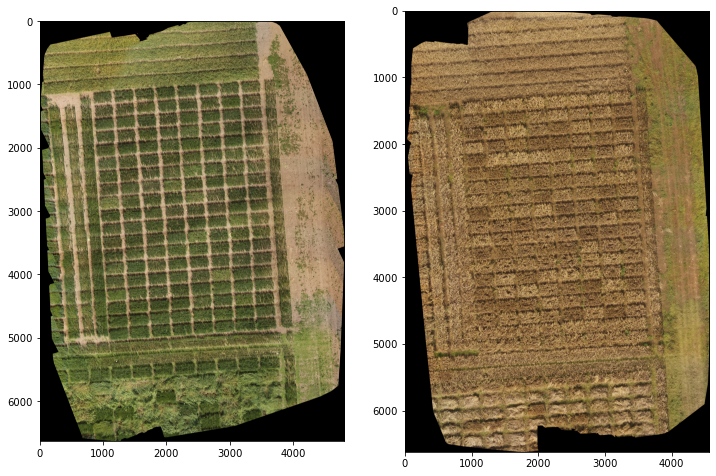

In [4]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1_np)
ax[1].imshow(img2_np)
plt.show()

In [5]:
with fiona.open("Data/AVIATE_plots_coded_15cm_in.shx", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

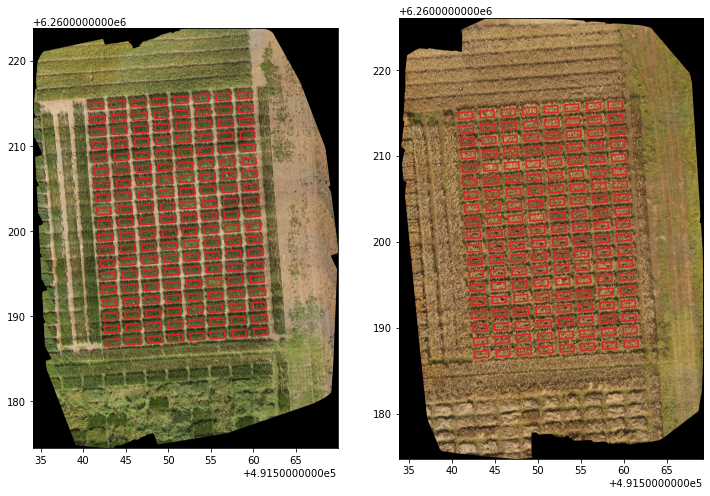

In [6]:
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0])
show(img2, ax=axes[1])

for shape in shapes:
    x, y = zip(*shape['coordinates'][0])
    axes[0].plot(x,y, 'tab:red')
    axes[1].plot(x,y, 'tab:red')
    
plt.show()

In [7]:
with rasterio.open(RGB_fp1) as src:
    out_image1, out_transform1 = rasterio.mask.mask(src, shapes, crop=False)
    out_meta1 = src.meta
    
with rasterio.open(RGB_fp2) as src:
    out_image2, out_transform2 = rasterio.mask.mask(src, shapes, crop=False)
    out_meta2 = src.meta    

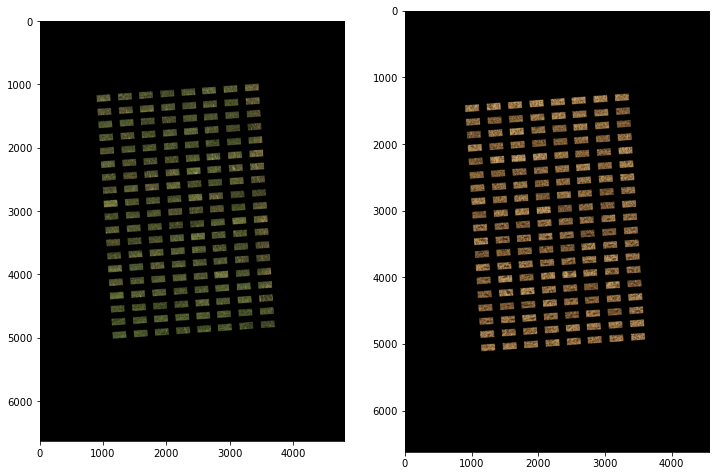

In [8]:
fig, axes = plt.subplots(1,2)
show(out_image1, ax=axes[0])
show(out_image2, ax=axes[1])
plt.show()

In [9]:
out_meta1.update({"driver": "GTiff",
                 "height": out_image1.shape[1],
                 "width": out_image1.shape[2],
                 "transform": out_transform1})

out_meta2.update({"driver": "GTiff",
                 "height": out_image2.shape[1],
                 "width": out_image2.shape[2],
                 "transform": out_transform2})

with rasterio.open("Images/RGB_masked_15th_July.tif", "w", **out_meta1) as dest:
    dest.write(out_image1)
    
with rasterio.open("Images/RGB_masked_25th_Aug.tif", "w", **out_meta2) as dest:
    dest.write(out_image2)

In [10]:
NDVI_fp1 = r'Data/AVIATE 15July21 50ft half image size_index_ndvi_narrowband.tif'
NDVI_fp2 = r'Data/AVIATE 25Aug21 50ft half image size_index_ndvi_narrowband.tif'

img1 = rasterio.open(NDVI_fp1)
img1_np = np.transpose(img1.read(),(1,2,0))

img2 = rasterio.open(NDVI_fp2)
img2_np = np.transpose(img2.read(),(1,2,0))

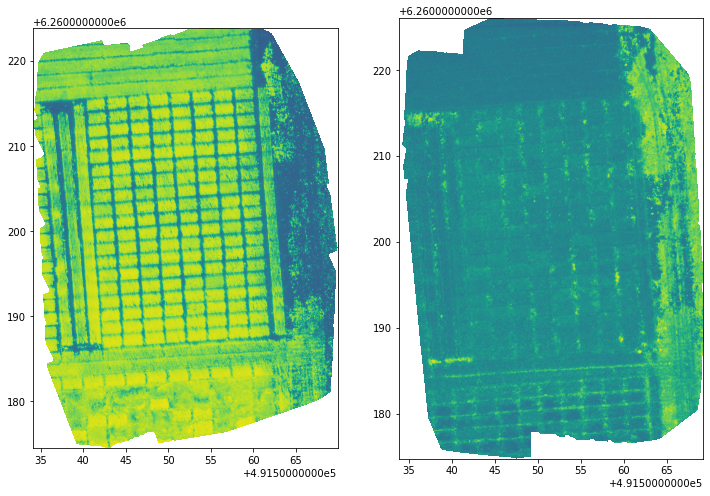

In [11]:
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)
plt.show()

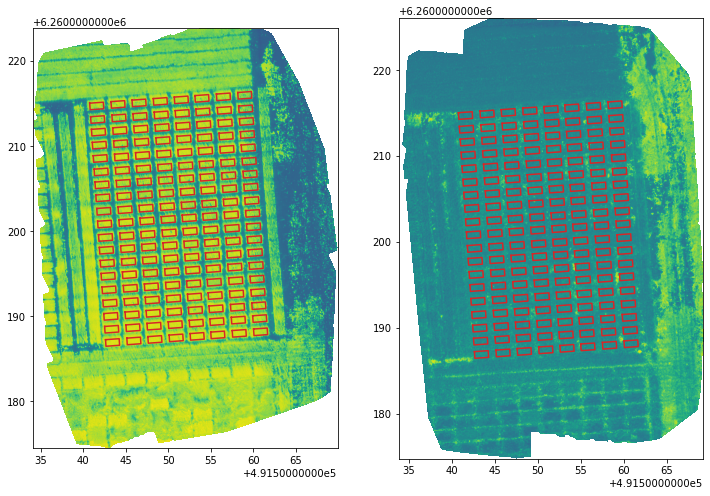

In [12]:
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)

for shape in shapes:
    x, y = zip(*shape['coordinates'][0])
    axes[0].plot(x,y, 'tab:red')
    axes[1].plot(x,y, 'tab:red')
    
plt.show()

In [13]:
with rasterio.open(NDVI_fp1) as src1:
    out_image1, out_transform1 = rasterio.mask.mask(src1, shapes, crop=False, nodata=np.nan)
    out_meta1 = src1.meta
    
with rasterio.open(NDVI_fp2) as src2:
    out_image2, out_transform2 = rasterio.mask.mask(src2, shapes, crop=False, nodata=np.nan)
    out_meta2 = src2.meta

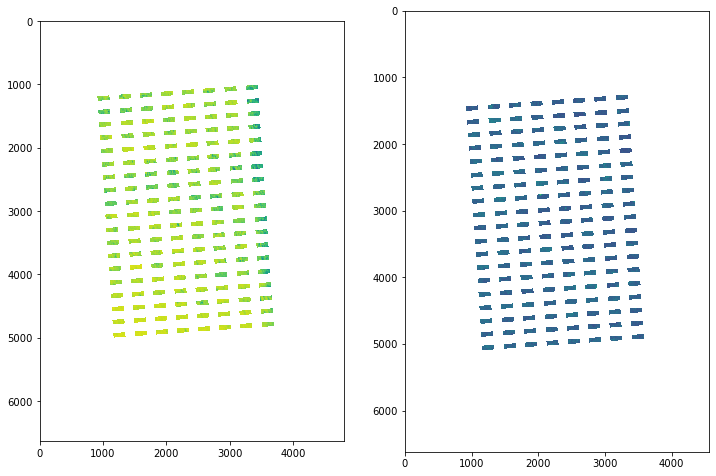

In [14]:
fig, axes = plt.subplots(1,2)
show(out_image1, ax=axes[0],cmap=cmap)
show(out_image2, ax=axes[1],cmap=cmap)
plt.show()

In [15]:
out_meta1.update({"driver": "GTiff",
                 "height": out_image1.shape[1],
                 "width": out_image1.shape[2],
                 "transform": out_transform1})

out_meta2.update({"driver": "GTiff",
                 "height": out_image2.shape[1],
                 "width": out_image2.shape[2],
                 "transform": out_transform2})

with rasterio.open("Images/NDVI_masked_15th_July.tif", "w", **out_meta1) as dest:
    dest.write(out_image1)
    
with rasterio.open("Images/NDVI_masked_25th_Aug.tif", "w", **out_meta2) as dest:
    dest.write(out_image2)

In [16]:
idx = random.sample(range(len(shapes)),1)
idx = idx[0]

shape = shapes[idx]

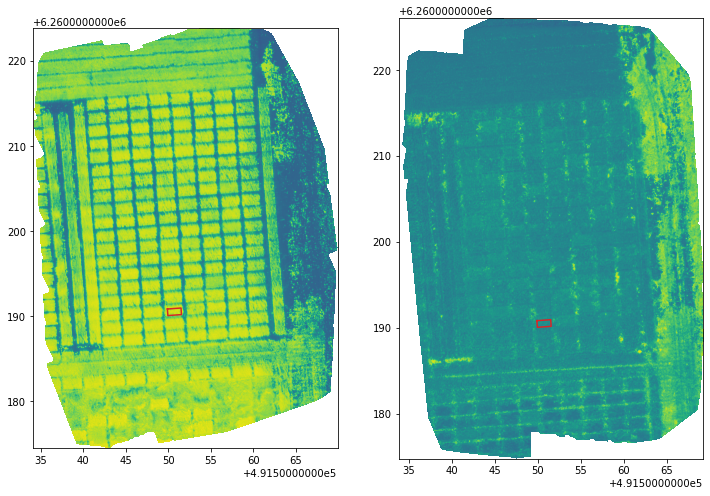

In [17]:
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)

x, y = zip(*shape['coordinates'][0])
axes[0].plot(x,y, 'tab:red')
axes[1].plot(x,y, 'tab:red')
    
plt.show()

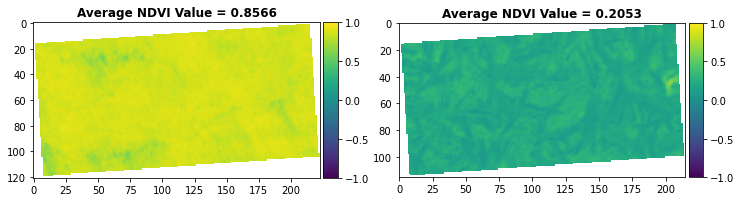

In [18]:
with rasterio.open(NDVI_fp1) as src1:
    out_image1, out_transform1 = rasterio.mask.mask(src1, [shape], crop=True, nodata=np.nan)
with rasterio.open(NDVI_fp2) as src2:
    out_image2, out_transform2 = rasterio.mask.mask(src2, [shape], crop=True, nodata=np.nan)

fig, axes = plt.subplots(1,2)
show(out_image1, ax=axes[0], title="Average NDVI Value = %1.4f" % np.nanmean(out_image1), cmap=cmap, vmin=-1, vmax=1)
show(out_image2, ax=axes[1], title="Average NDVI Value = %1.4f" % np.nanmean(out_image2), cmap=cmap, vmin=-1, vmax=1)

divider = make_axes_locatable(axes[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar( cm.ScalarMappable(norm=colors.Normalize(vmin=-1, vmax=1), cmap=cmap), ax=axes[0], cax=cax)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar( cm.ScalarMappable(norm=colors.Normalize(vmin=-1, vmax=1), cmap=cmap), ax=axes[1], cax=cax)
plt.show()

In [19]:
header = ['#pixels','2021_07_15', '2021_08_25']

with open('ndvi_res.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
    for shape in shapes:
        with rasterio.open(NDVI_fp1) as src1:
            out_image1, out_transform1 = rasterio.mask.mask(src1, [shape], crop=True, nodata=np.nan)
        
        with rasterio.open(NDVI_fp2) as src2:
            out_image2, out_transform2 = rasterio.mask.mask(src2, [shape], crop=True, nodata=np.nan)
        
        writer.writerow([np.count_nonzero(~np.isnan(out_image1)),np.nanmean(out_image1),np.nanmean(out_image2)])

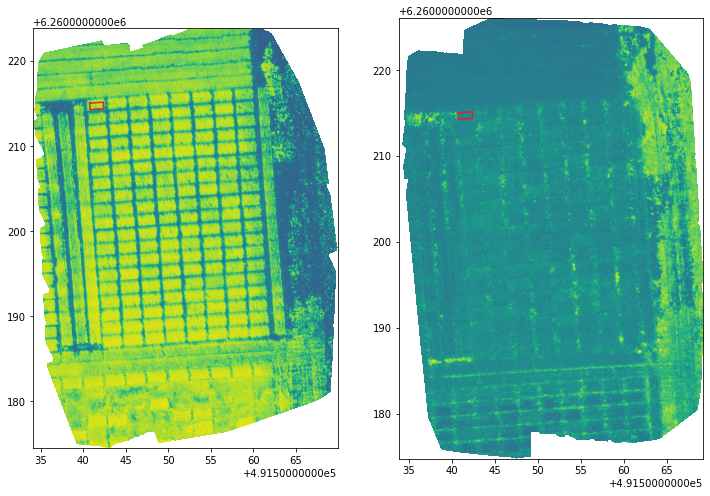

In [20]:
shape = shapes[0]
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)

x, y = zip(*shape['coordinates'][0])
axes[0].plot(x,y, 'tab:red')
axes[1].plot(x,y, 'tab:red')
    
plt.show()

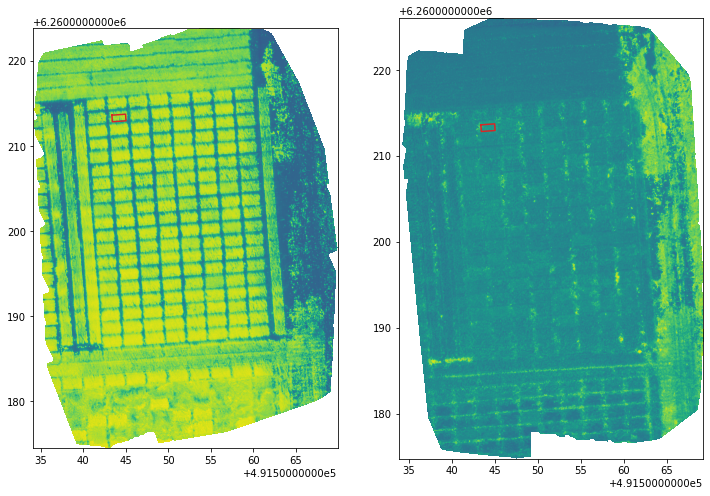

In [22]:
shape = shapes[1]
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)

x, y = zip(*shape['coordinates'][0])
axes[0].plot(x,y, 'tab:red')
axes[1].plot(x,y, 'tab:red')
    
plt.show()

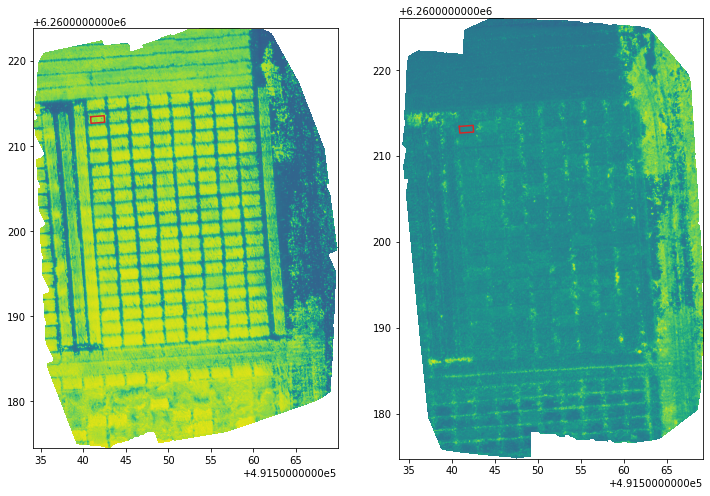

In [23]:
shape = shapes[2]
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)

x, y = zip(*shape['coordinates'][0])
axes[0].plot(x,y, 'tab:red')
axes[1].plot(x,y, 'tab:red')
    
plt.show()

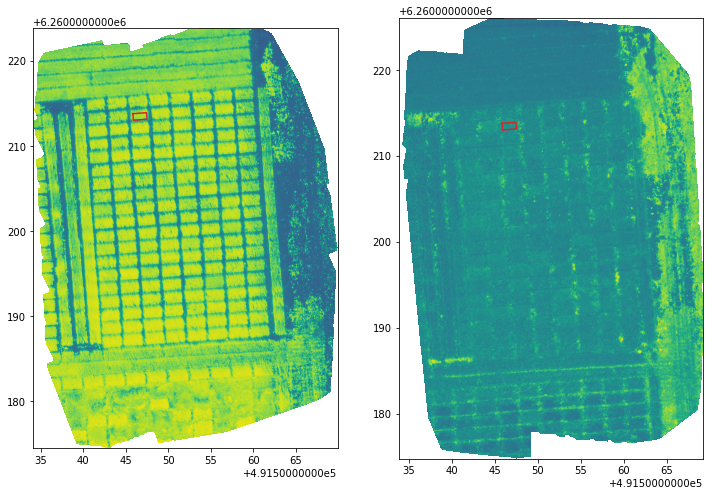

In [24]:
shape = shapes[3]
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)

x, y = zip(*shape['coordinates'][0])
axes[0].plot(x,y, 'tab:red')
axes[1].plot(x,y, 'tab:red')
    
plt.show()

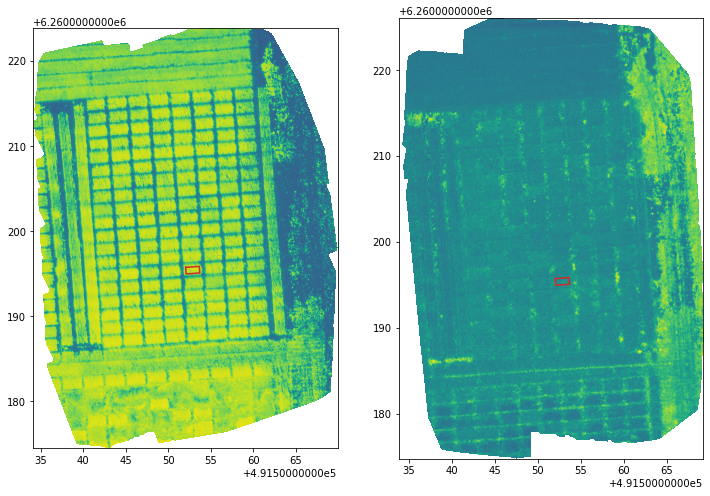

In [27]:
shape = shapes[101]
fig, axes = plt.subplots(1,2)
show(img1, ax=axes[0],cmap=cmap)
show(img2, ax=axes[1],cmap=cmap)

x, y = zip(*shape['coordinates'][0])
axes[0].plot(x,y, 'tab:red')
axes[1].plot(x,y, 'tab:red')
    
plt.show()